In [1]:
import pandas as pd
import dask.dataframe as dd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("/lcrc/project/FastBayes/rayandrew/alibaba-data/container_usage_splitted/container_usage.aa", names=[
    "container_id",
    "machine_id",
    "time_stamp",
    "cpu_util_percent",
    "mem_util_percent",
    "cpi",
    "mem_gps",
    "mpki",
    "net_in",
    "net_out",
    "disk_io_percent"
], chunksize=5_000_000)

In [3]:
# usage_df.container_id.unique()
usage_df = next(df)

In [4]:
# usage_df.container_id.unique()

In [5]:
# df[df.container_id != "<NA>"].head()
usage_df = usage_df[usage_df.container_id.notna()].reset_index(drop=True)
# df[df.container_id == "c_1"].head()

In [6]:
usage_df.head()

,container_id,machine_id,time_stamp,cpu_util_percent,mem_util_percent,cpi,mem_gps,mpki,net_in,net_out,disk_io_percent
0,c_1,m_2556,86610,12,88,NaN,NaN,NaN,1.22,1.15,7.0
1,c_1,m_2556,87230,9,88,NaN,NaN,NaN,1.22,1.15,12.0
2,c_1,m_2556,87420,12,88,NaN,NaN,NaN,1.22,1.15,8.0
3,c_1,m_2556,87440,13,88,NaN,NaN,NaN,1.22,1.15,8.0
4,c_1,m_2556,87710,10,88,NaN,NaN,NaN,1.22,1.15,14.0


In [7]:
# df[df.container_id == "c_1"].time_stamp.unique().compute()

In [8]:
meta_df = pd.read_csv("/lcrc/project/FastBayes/rayandrew/alibaba-data/container_meta.csv", names=[
    "container_id",
    "machine_id",
    "time_stamp",
    "app_du",
    "status",
    "cpu_request",
    "cpu_limit",
    "mem_size"
])
meta_df = meta_df.drop_duplicates(subset=['container_id', 'machine_id'], keep='last')

In [9]:
meta_df.head()

,container_id,machine_id,time_stamp,app_du,status,cpu_request,cpu_limit,mem_size
2,c_1,m_2556,338909,app_5052,started,400,400,1.56
7,c_2,m_962,431364,app_8125,started,800,800,3.13
12,c_3,m_644,337526,app_66,started,400,400,1.56
19,c_4,m_1423,369285,app_3222,started,400,400,1.56
24,c_5,m_334,356165,app_5955,started,400,400,1.56


In [10]:
# for i in range(1001, 2000):
#     test_df = container_meta_df[container_meta_df.container_id == f"c_{i}"]
#     # test_df['matching'] = df.apply(lambda x: x.col1 == x.col3 == x.col4, axis=1)
#     if test_df.cpu_request.unique().compute().size > 1:
#         print(test_df.cpu_request.unique().compute())
#         test_df.head(n=100)
#         break
#     # print(test_df.cpu_request.unique().compute())

In [55]:
merged_df = pd.merge(usage_df, meta_df,  how='left', left_on=['container_id', 'machine_id'], right_on = ['container_id', 'machine_id'])
merged_df = merged_df.sort_values(by=["time_stamp_x", "time_stamp_y"]).reset_index(drop=True)
merged_df = merged_df.drop(columns=["time_stamp_y"])
merged_df = merged_df.rename(columns={"time_stamp_x": "time_stamp"})
merged_df = merged_df.sort_values(by=["time_stamp"])
merged_df = merged_df.reset_index(drop=True)
merged_df

,container_id,machine_id,time_stamp,cpu_util_percent,mem_util_percent,cpi,mem_gps,mpki,net_in,net_out,disk_io_percent,app_du,status,cpu_request,cpu_limit,mem_size
0,c_13090,m_3011,86400,0,84,NaN,NaN,NaN,0.04,0.06,4.0,app_6592,started,400,480,1.56
1,c_11638,m_2463,86400,7,99,NaN,NaN,NaN,0.11,0.08,2.0,app_6416,started,400,400,1.56
2,c_13316,m_2781,86400,4,83,NaN,NaN,NaN,0.04,0.05,2.0,app_849,started,400,400,1.56
3,c_13257,m_1579,86400,14,99,NaN,NaN,NaN,0.13,0.16,4.0,app_4371,started,400,400,1.56
4,c_1415,m_3892,86400,13,80,NaN,NaN,NaN,0.22,0.10,57.0,app_3632,started,400,400,1.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996492,c_10089,m_2096,777590,9,99,2.68,0.00,1.0,0.08,0.10,5.0,app_56,started,400,400,1.56
4996493,c_10574,m_839,777590,5,99,1.57,0.10,0.0,0.03,0.04,4.0,app_7876,started,800,800,3.13
4996494,c_15003,m_3327,777590,7,100,1.30,0.02,0.0,0.00,0.00,4.0,app_5420,started,400,400,1.56
4996495,c_14902,m_2263,777590,1,45,3.03,0.00,0.0,0.00,0.00,6.0,app_2205,started,1600,1600,6.25


In [133]:
def clean_data(data: pd.DataFrame) -> pd.DataFrame:
        data = data[
            data.cpu_request.notna()
            & data.mem_size.notna()
            & data.cpu_limit.notna()
            & (data.cpu_util_percent > 0)
            & (data.cpu_util_percent <= 100)
        ]
        # data = data.dropna()
        data = data.sort_values(by=["time_stamp"])
        data = data.reset_index(drop=True)
        return data

def drop_columns(data: pd.DataFrame, columns: list[str]):
    data = data.drop(columns=columns)
    data = data.reset_index(drop=True)
    return data

def _discretize_column(
    series: pd.Series, n_bins: int = 4
) -> pd.Series:
    return pd.cut(series, bins=n_bins, labels=False)

def discretize_column(data: pd.DataFrame, column: str, new_column: str | None = None, n_bins: int = 4) -> pd.DataFrame:
    from sklearn.preprocessing import minmax_scale
    if new_column is None:
        new_column = column
    column_data = minmax_scale(data[column], feature_range=(0, 100))
    data[new_column] = _discretize_column(
        column_data, n_bins
    )
    return data

In [134]:
# len(merged_df), len(merged_df[0:20000])

In [137]:

def plot_hist_bar(
    dataset: pd.DataFrame, target: str
):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 8))
    sns.countplot(
        x=target,
        data=dataset,
        ax=ax1,
    )
    ax1.bar_label(ax1.containers[0])
    ax1.set_title(f"Train subset")
    data.cpu_util_percent.plot(ax=ax2)
    ax2.set_ylim(0, 100)
    return fig

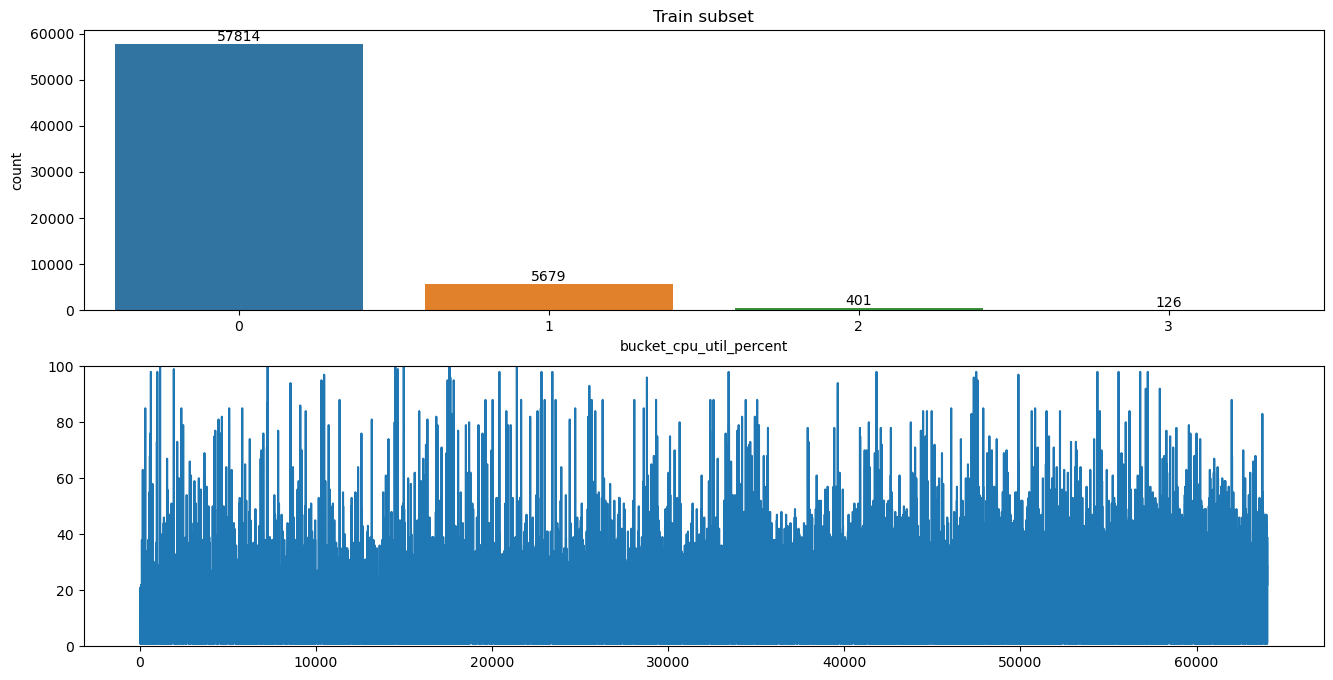

In [138]:
target_name = "cpu_util_percent"
bucket_target = f"bucket_{target_name}"
n_bins = 4
# data = merged_df[:1_500_000].copy(deep=True)

data = merged_df[120000:190000].copy()
# data = merged_df.copy(deep=True)
data = clean_data(data)
data = discretize_column(data, target_name, bucket_target, n_bins)
data.head()


fig = plot_hist_bar(data, bucket_target)
fig.show()